# First Kaggle Entry

I have done a full coding bootcamp for data science, yet have never attempted nor even started a Kaggle competition. This entry (although practice) is essentially for practice. I don't want my skills to get rusty while I am not in a role which uses all the tools that I have used in class. If possible and relevant, I will try to use every tool that I have learned in class along with **ONE** new tool that I want to learn.

In [205]:
# Import libraries in Python 3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

sns.set(style="darkgrid", font_scale=2)

In [206]:
# Read in the full training data and look at the first 5 rows
df = pd.read_csv('../datasets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [208]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [210]:
# Embarked and Age are missing values as well. Look at these values.
# Since only two nulls exist for Embarked, I will drop it
df = df[df.Embarked.notnull()]

In [211]:
# Look at Cabin info. It is missing ~700 observations. Maybe I could use this data, but it's better to drop.
df.drop('Cabin', axis=1, inplace=True)

In [212]:
# Change sex column to a binary
df['Male'] = pd.get_dummies(df.Sex, drop_first=True)
df.drop('Sex', axis=1, inplace=True)

In [222]:
# Or run as categorical values
df.Embarked = df.Embarked.astype('category')

In [220]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


## Exploratory Data Analysis
---

Create a simple plot to see if any outliers exist, general trends (in relation to surviving), and etc.

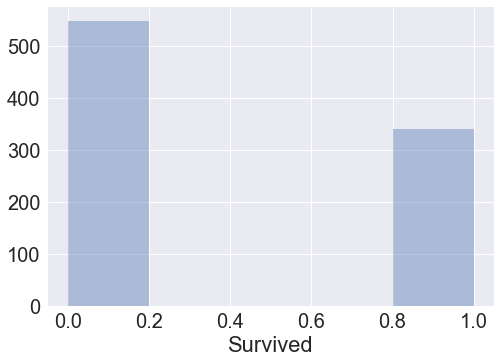

In [221]:
sns.distplot(df.Survived, kde=False)

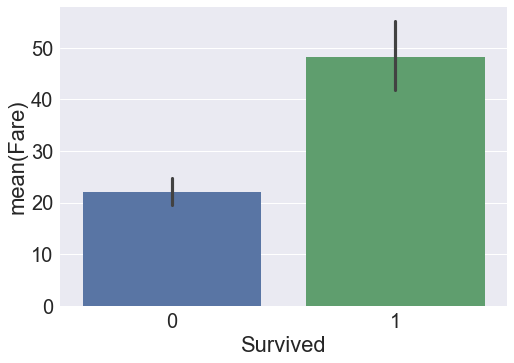

In [171]:
sns.barplot(df.Survived, df.Fare)

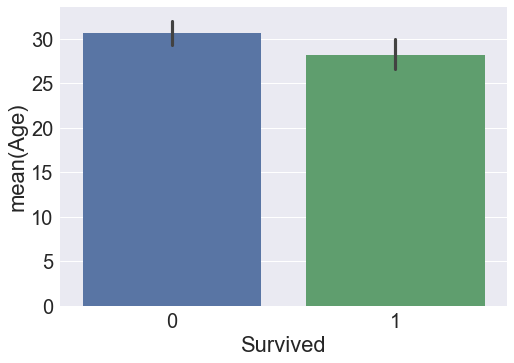

In [172]:
sns.barplot(df.Survived, df.Age)

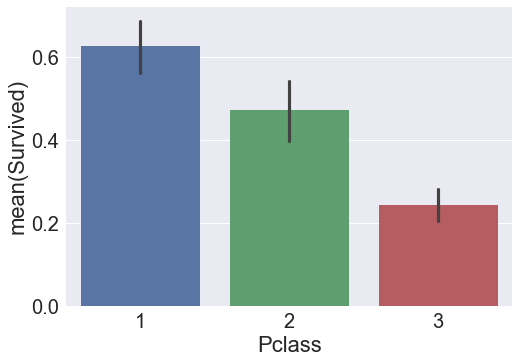

In [173]:
sns.barplot(x=df.Pclass, y=df.Survived)
# Nice graph that shows that Pclass 1 had more survivors > Pclass 2 > Pclass 3

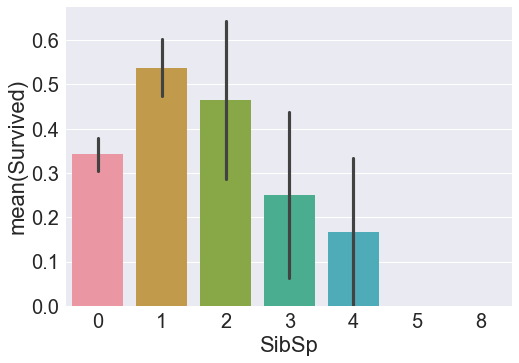

In [174]:
sns.barplot(x=df.SibSp, y=df.Survived)

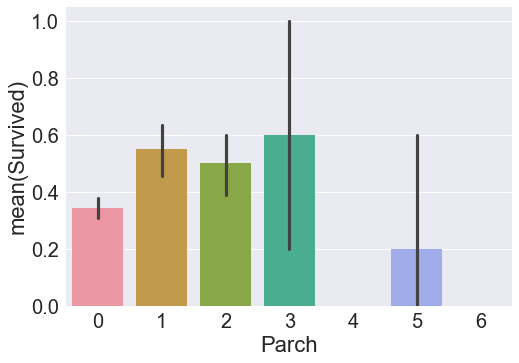

In [226]:
sns.barplot(x=df.Parch, y=df.Survived)

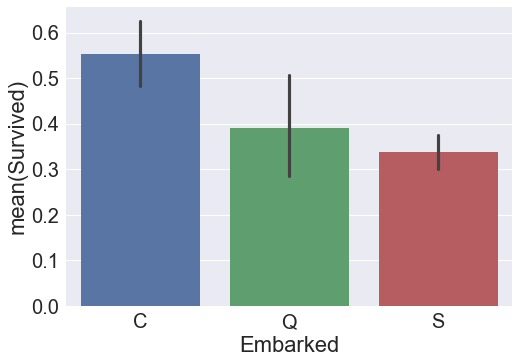

In [223]:
sns.barplot(x=df.Embarked, y=df.Survived)

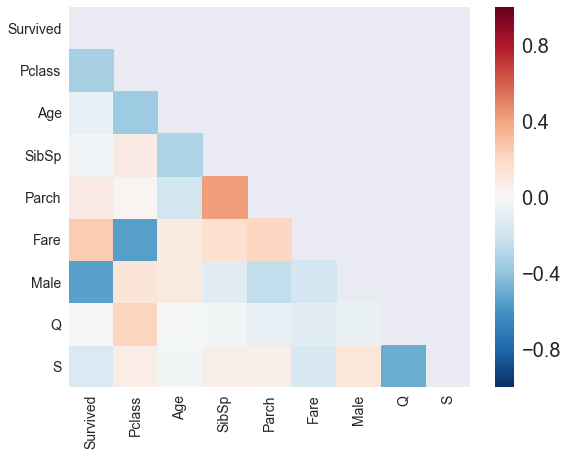

In [176]:
# Set init variables
corr = df.loc[:,'Survived':].corr()

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, annot=False, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation='vertical')
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation='horizontal')

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


## Some additional feature engineering
---
Some features that I might want to extract:
- **Name titles:** Mrs, Master, Don, Rev, Dr, Mme, Ms, Major, Lady, Sir, Mlle, Col, Capt, the Countess, Jonkheer (Dutch honorific)
- **Name length**
- **Age brackets:** By decade or standard deviations
- **Fare brackets:**

In [237]:
df.Name.apply(lambda x: x.split(',')[1].split('.')[0]).unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [246]:
# Making column for those with special titles (every title except Mr, Ms, and Miss)
def title_finder(row):
    titles = [' Mrs', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
              ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
              ' the Countess', ' Jonkheer']
    if row.split(',')[1].split('.')[0] in titles:
        title_bool = 1
    else:
        title_bool = 0
    return title_bool

In [247]:
df['Title'] = df.Name.apply(title_finder)

In [249]:
# Making a column for name length (including punctuation as well)
df['Length'] = df.Name.apply(len)

# Dropping Name because I'm not sure what more information I can gather
df.drop('Name', axis=1, inplace=True)

In [250]:
# Change Embarked column to dummies
# Leaving in first column for now so that EDA will be easier to view
df = df.join(pd.get_dummies(df.Embarked, drop_first=True))
df.drop('Embarked', axis=1, inplace=True)

# Dropping PassengerId because that is an arbitrary given ID number
df.drop('PassengerId', axis=1, inplace=True)

# Finally dropping Ticket column because I'm not sure of any info that can be derived through that
df.drop('Ticket', axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Embarked'

## Try KNN imputation for Age

Maybe do KNN imputation for Age based on other features except survived? Not a very good correlation between age and other features. Try doing PCA as well.

In [285]:
ageless = df[df.Age.isnull()].drop(['Survived', 'Age'], axis=1)
agefull = df[df.Age.notnull()].drop(['Survived'], axis=1)

In [289]:
from sklearn.neighbors import KNeighborsRegressor

X = agefull.drop('Age', axis=1)
y = agefull.Age

ss = StandardScaler()
Xs = ss.fit_transform(X)
Xtr, Xte, ytr, yte = train_test_split(Xs, y, train_size=0.7, random_state=30)

In [290]:
knn = KNeighborsRegressor()
knn.fit(Xtr, ytr)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [291]:
preds = knn.predict(Xte)
print(knn.score(Xte, yte))

0.195630954292


# Try PCA and gridsearch

In [292]:
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV